# Naive Bayes Classifiers

### Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

# Text classinfication using Naive Bayes

In [1]:
# required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
data= fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# training the data these categories
train= fetch_20newsgroups(subset='train',categories= categories)
# test the data these categories
test= fetch_20newsgroups(subset='test',categories=categories)
# printing training data
print(train.data[5])


From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [4]:
# importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [5]:
# creating model based on multinominal Naive Bayes
model= make_pipeline(TfidfVectorizer(),MultinomialNB())
# Training the model with the train data
model.fit(train.data,train.target)
# create labels for the test data
labels= model.predict(test.data)
# create confusion matrix and heatmap
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test.target,labels)
print(cm)

[[166   0   0   1   0   1   0   0   1   1   1   3   0   6   3 123   4   8
    0   1]
 [  1 252  15  12   9  18   1   2   1   5   2  41   4   0   6  15   4   1
    0   0]
 [  0  14 258  45   3   9   0   2   1   3   2  25   1   0   6  23   2   0
    0   0]
 [  0   5  11 305  17   1   3   6   1   0   2  19  13   0   5   3   1   0
    0   0]
 [  0   3   8  23 298   0   3   8   1   3   1  16   8   0   2   8   3   0
    0   0]
 [  1  21  17  13   2 298   1   0   1   1   0  23   0   1   4  10   2   0
    0   0]
 [  0   1   3  31  12   1 271  19   4   4   6   5  12   6   3   9   3   0
    0   0]
 [  0   1   0   3   0   0   4 364   3   2   2   4   1   1   3   3   4   0
    1   0]
 [  0   0   0   1   0   0   2  10 371   0   0   4   0   0   0   8   2   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 357  22   0   0   0   2   9   1   1
    0   0]
 [  0   0   0   0   0   0   0   1   0   4 387   1   0   0   1   5   0   0
    0   0]
 [  0   2   1   0   0   1   1   3   0   0   0 383   1   0   0   3

Text(124.80000000000001, 0.5, 'predict label')

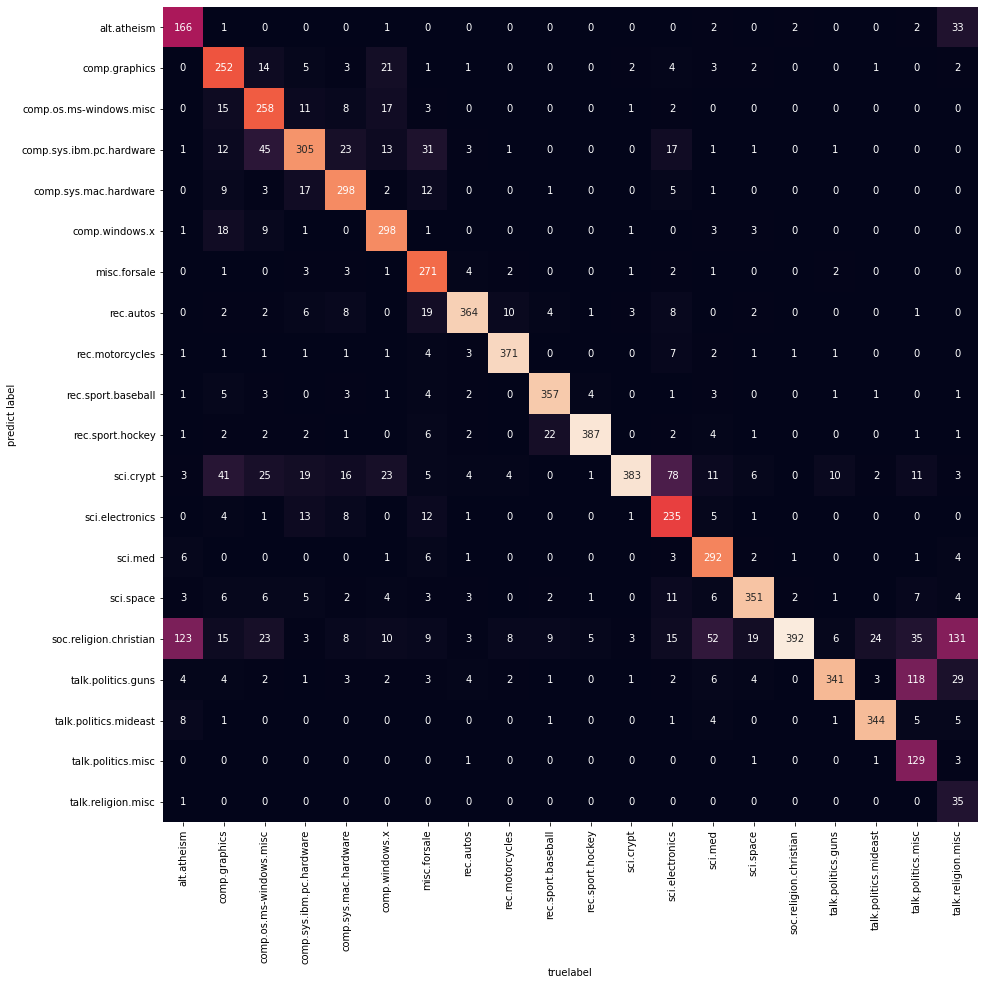

In [6]:
# create heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cm.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=test.target_names)
# plotting heatmap of confusion  matrix
plt.xlabel('truelabel')
plt.ylabel('predict label')

In [16]:
# predicting categories on new data  based on trained model
def predict_categories(s,train= train,model=model):
    pred= model.predict([s])
    return train.target_names[pred[0]]

# Gaussian Naive Bayes classifier

### In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values as shown below:

# implementation of Gaussian Naive Bayes classifier using scikit-learn.

In [8]:
# implementing with gaussing NB
# load the iris dataset
from sklearn.datasets import load_iris

iris= load_iris()

In [9]:
# split data into denpendent and independent variabels
X= iris.data
y= iris.target

In [10]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('shape of X_train=',X_train.shape)
print('shape of X_test=',X_test.shape)
print('shape of y_train=',y_train.shape)
print('shape of y_test=',y_test.shape)

shape of X_train= (120, 4)
shape of X_test= (30, 4)
shape of y_train= (120,)
shape of y_test= (30,)


In [11]:
# import gaussin nb
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
# fit model into training datasets
gnb.fit(X_train,y_train)
# making predictions on the testing set 
y_pred=gnb.predict(X_test)
y_test[:2]

array([2, 1])

In [12]:
y_pred[:2]

array([2, 1])

In [13]:
# import confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [15]:
print("Gaussian Naive Bayes model accuracy:",accuracy_score(y_test,y_pred)*100)

Gaussian Naive Bayes model accuracy: 96.66666666666667
